In [2]:
import os
import os.path as osp

import sys
sys.path.append("..")


Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


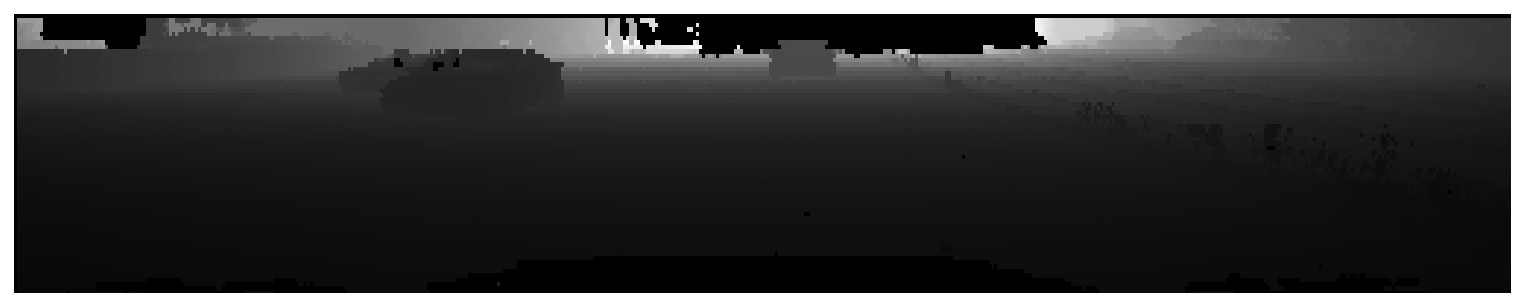

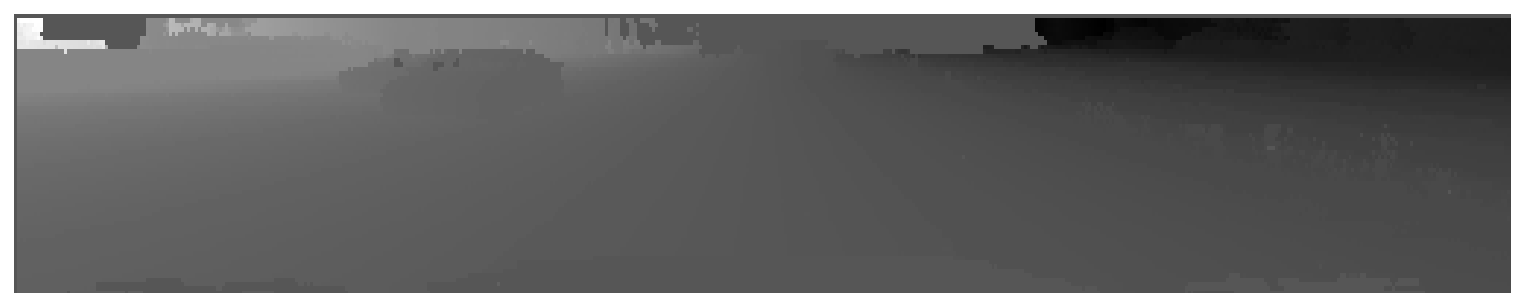

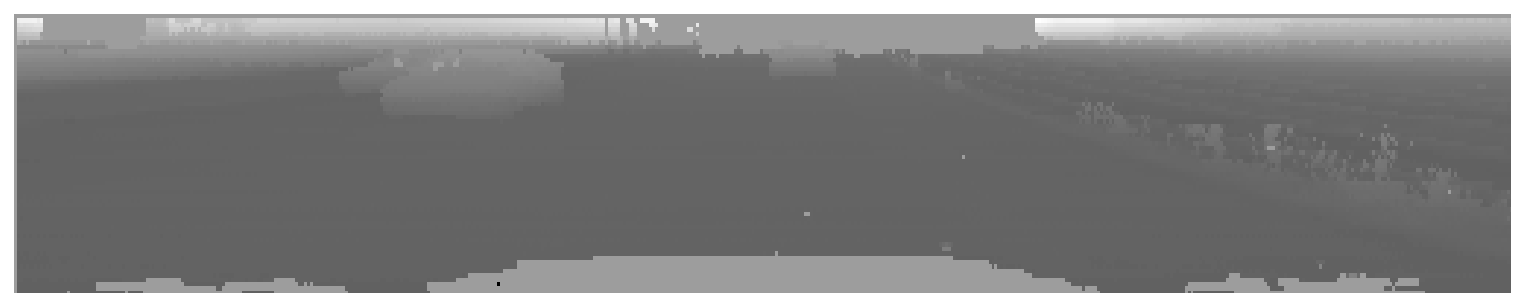

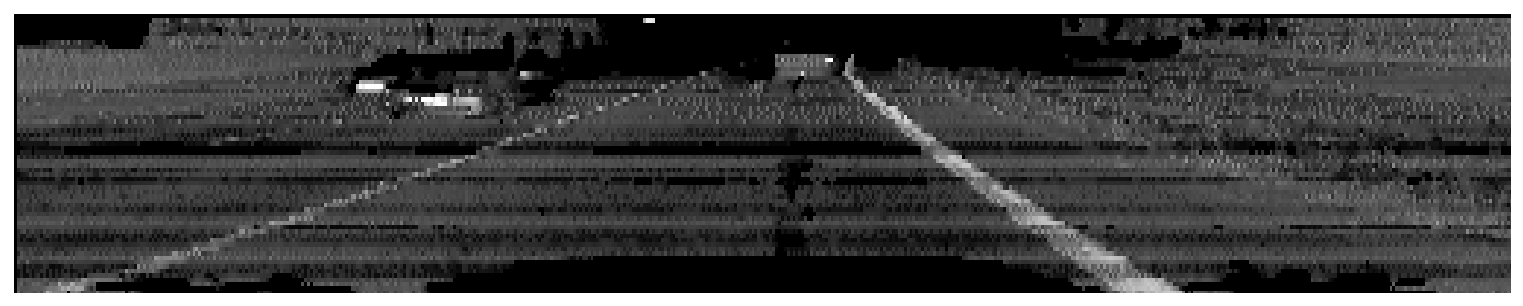

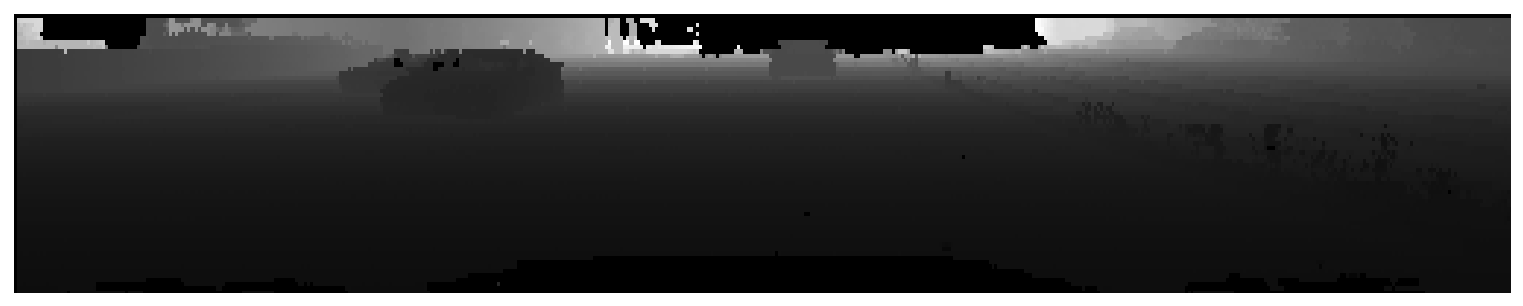

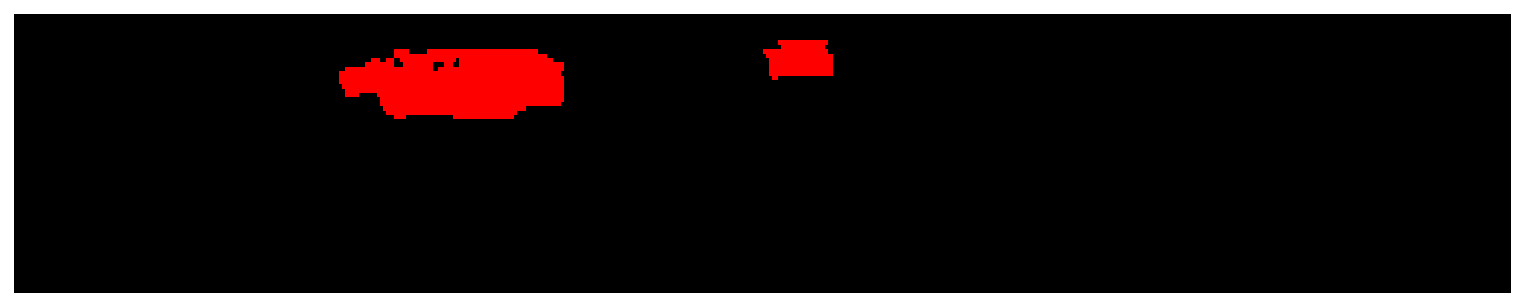

In [1]:
import sys
sys.path.append("..")

import torch
import torch.utils.data

import numpy as np

import matplotlib.pyplot as plt

import core

def visualize(fmap: np.ndarray, pallete: dict):
    img = np.zeros((*fmap.shape[:2], 3), dtype=np.uint8)
    for idx, (cls_name, color) in enumerate(pallete.items()):
        img[fmap == idx] = np.array(color)
    return img

def show_spherical_proj(img: np.ndarray):
    plt.figure(figsize=(12, 6), dpi=128, tight_layout=True)
    plt.axis([512, 0, 0, 64])
    plt.axis("off")
    plt.imshow(img, cmap="gray", aspect=1.5, interpolation='nearest')

args_dataset = core.readconfyaml.read("../conf/dataset/KITTIObj3d.yaml")
args_dataset.root = "../data/kittiobj3d"
dataset = core.dataset.KITTIObj3d(
    **args_dataset,
    split="train"
)
loader = torch.utils.data.DataLoader(
    dataset=dataset,
    batch_size=1,
    shuffle=True
)

for iter, (fmap, gdth) in enumerate(loader):
    show_spherical_proj(fmap[0][0]) # x
    show_spherical_proj(fmap[0][1]) # y
    show_spherical_proj(fmap[0][2]) # z
    show_spherical_proj(fmap[0][3]) # i
    show_spherical_proj(fmap[0][4]) # r
    show_spherical_proj(visualize(gdth[0], args_dataset.pallete))
    break

tensor([[0.0000, 0.0000, 0.0000,  ..., 0.0368, 0.0369, 0.0368],
        [0.0275, 0.0275, 0.0276,  ..., 0.0373, 0.0373, 0.0372],
        [0.0273, 0.0275, 0.0276,  ..., 0.0379, 0.0378, 0.0377],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],
       dtype=torch.float64) tensor([0.0000, 0.0187, 0.0192,  ..., 0.9828, 0.9851, 1.0000],
       dtype=torch.float64)


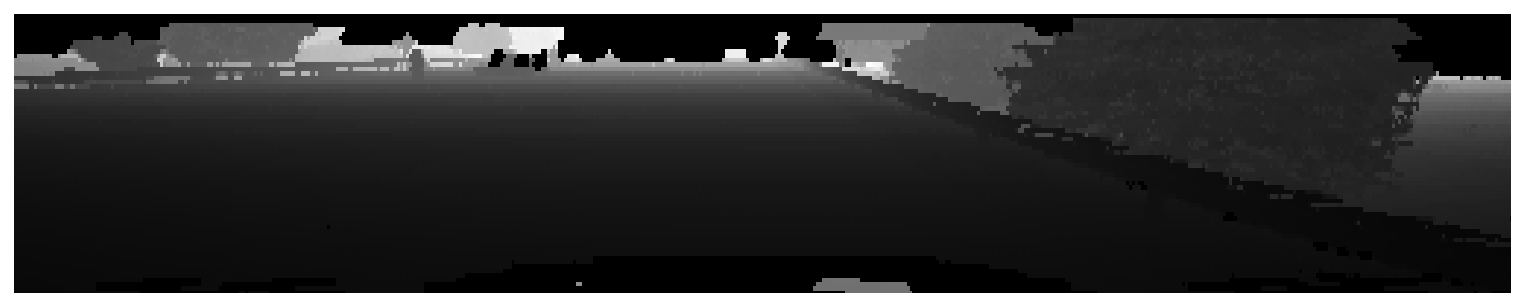

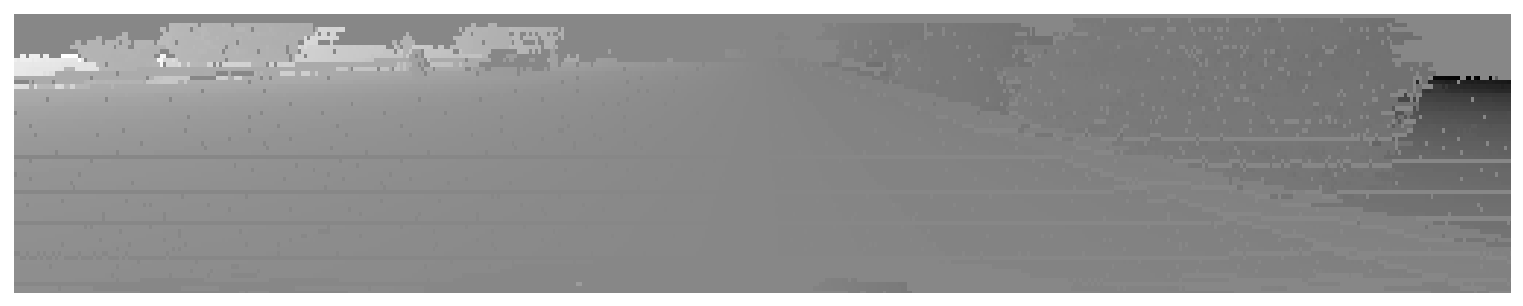

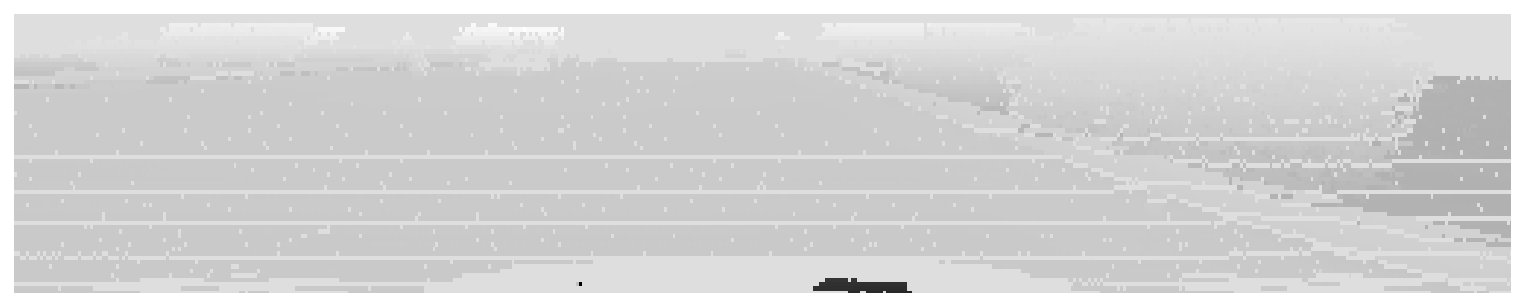

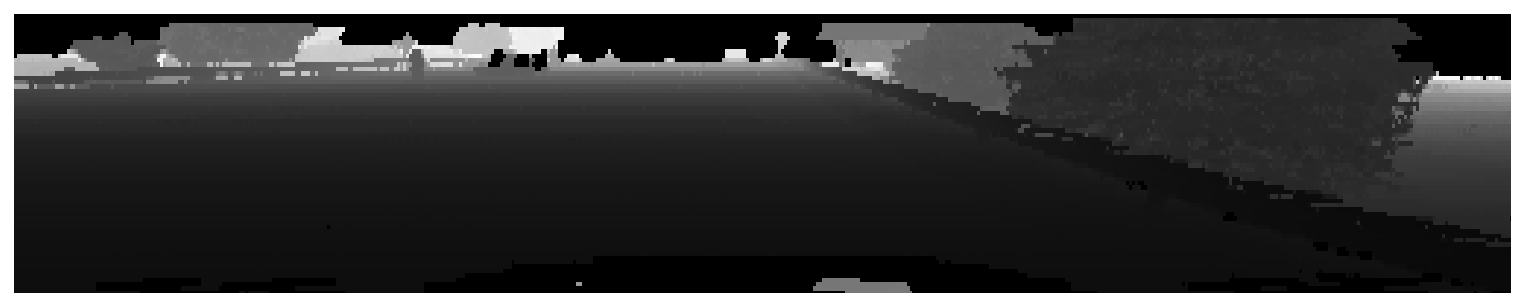

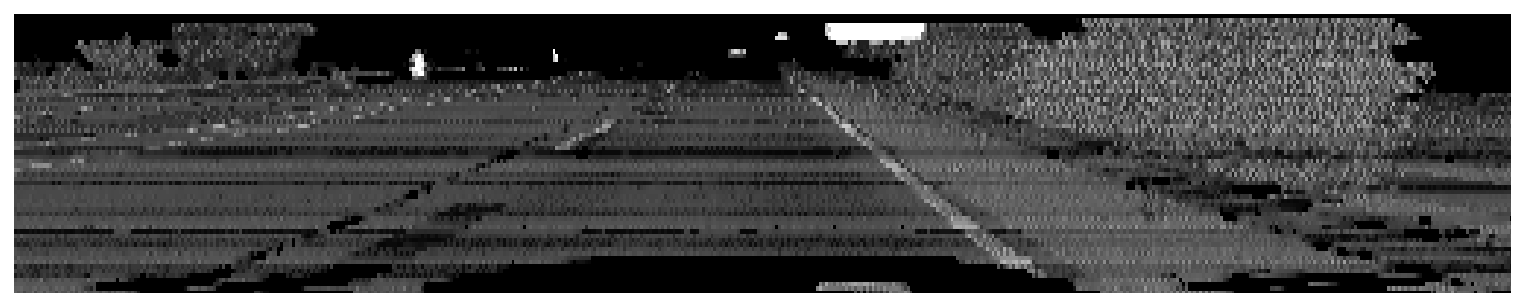

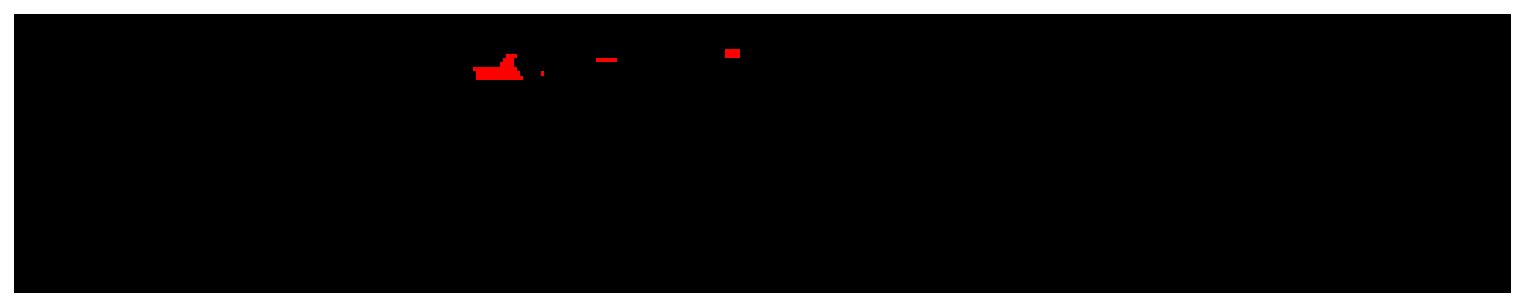

In [2]:
import sys
sys.path.append("..")

import torch
import torch.utils.data


import core

def visualize(fmap: np.ndarray, pallete: dict):
    img = np.zeros((*fmap.shape[:2], 3), dtype=np.uint8)
    for idx, (cls_name, color) in enumerate(pallete.items()):
        img[fmap == idx] = np.array(color)
    return img


conf_dataset = core.readconfyaml.read("../conf/data.yaml")
train_dataset = core.dataset.KITTIObj3d(
    "../data", "train", conf_dataset
)
train_loader = torch.utils.data.DataLoader(
    dataset=train_dataset,
    batch_size=1,
    shuffle=True,
    num_workers=4
)

for iter, (fmap, gdth) in enumerate(train_loader):
    sample = fmap[0]
    print(sample[0], torch.unique(sample[0]))
    show_spherical_proj(sample[0]) # x
    show_spherical_proj(sample[1]) # y
    show_spherical_proj(sample[2]) # z
    show_spherical_proj(sample[3]) # d
    show_spherical_proj(sample[4]) # i
    show_spherical_proj(visualize(gdth[0], conf_dataset.pallete))
    

    break

In [1]:
import sys
sys.path.append("..")

import core

import torch.utils.data

kittisem = core.dataset.KITTISemantic(
    root="../data/kittisem",
    seq_list=["00", "01", "02"]
)

dataloader = torch.utils.data.DataLoader(
    dataset=kittisem,
    batch_size=4,
    shuffle=True
)

for iter, (data, gdth) in enumerate(kittisem):
    print(data.shape, gdth.shape)
    break

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
(122577, 4) (122577,)


In [6]:
import utils
import numpy as np

a = np.random.rand(4, 3)

b = a[:, 0]
b *= 100
b = 0

print(a)
print(b)

[[31.06521544  0.52059074  0.09946216]
 [50.33590774  0.44559131  0.97620896]
 [61.16846111  0.46569185  0.9187121 ]
 [ 8.83337736  0.39226834  0.22677735]]
0
